**This study utilizes the MNIST data set to test how using PCA as a preliminary to random forest classifier will impact the predictive accuracy of the model as well as the time spent on model development and implementation.**

**The first 60 thousands observations of MNIST data set are used as train set while the rest is holdout as test set. We first train a random forest classifier (Model 1) on the train set and evaluate the model's performance on the holdout test set with F1 score. The time spent on developing and implementing Model 1 is recorded and stored, so dose the F1 value. In the second stage, we utilize Pipeline to conduct PCA transformation on the train set before train the transformed train set with a random forest classifier (Model 2). The performance of Model 2 is evaluated on the holdout test set as well with F1 score as performance index. The time spent on developing and implementing Model 2 is also recorded and stored.**

**When comparing the two models on their predictive accuracy (F1 score) and development/implementation time, we notice that Model 1 which preserve all the dimensions of the original MNIST data set, achieves higher accuracy with a higher F1 score than Model 2 which preserve 95% of the variability in the original explanatory variables. Model 2 also takes 353.6% more time to develop and implement than Model 1.**

**Based on the result, it is recommended to the management not to use PCA as preliminary approach for random forest classification as it neither improves the predictive accuracy nor decrease time on model development and implementation. There are a few reasons which lead to the result. First, random forest classifier performs well on high dimensions without transformation/regularization as it's transformation invariant. While PCA can reduce ddimensionality of the data set dramatically, the default setting of max_feature parameter in randomforestcalssifier is sqrt(features). This means that the difference between the number of features to consider when looking for the best split before or after PCA transformation is smaller than it may have appeared. Additionally, random forest classifier iterates over possible splits that optimize the criterion. By reducing the number of features, we might have made it more difficult to find the split, leading the algorithm to perform more iterations in order to find a good split.**

**It is important to point out that the conclusion drawn from this study doesn’t necessarily apply to other machine learning classification algorithms, such as SVM or neutral network which are sensitive to data transformation. For algorithms like SVM and neutral network, PCA transformation will most likely improve the model’s predictive performance. Take neutral network as an example, most of the real-world data samples used to train artificial neural networks (ANNs) consist of correlated information caused by overlapping input instances. Correlation in sampled data normally creates confusion over ANNs during the learning process and thus, degrades their generalization capability. (Mohamad-Saleh & Hoyle 2008). Since PCA can eliminate correlated information through dimensionality reduction, therefore, using PCA as preliminary process to neutral network classifier will likely improve the model’s performance.**

# SETUP

Seed value for random number generators to obtain reproducible results

In [1]:
RANDOM_SEED = 1

Import base packages into the namespace for this program

In [2]:
import numpy as np
import pandas as pd

Visualization setup

In [3]:
import matplotlib
import matplotlib.pyplot as plt

Classification performance scoring code adopted from Scikit Learn documentation

In [4]:
from sklearn.metrics import f1_score

Specify the set of classifiers being evaluated

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# MNIST DATASET 

Import data Scikit Learn

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Users\feifa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\feifa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Define arrays from the complete data set and show structure of numpy arrays. Code adapted from Miller (2017) exploring-mnist-v001.py.

In [7]:
X, y = mnist['data'], mnist['target']
print('\n Structure of explanatory variable array:', X.shape)
print('\n Structure of response array:', y.shape)


 Structure of explanatory variable array: (70000, 784)

 Structure of response array: (70000,)


Visualize the the sequential organization of the MNIST data with index plot. Code adapted from Miller (2017) exploring-mnist-v001.py.

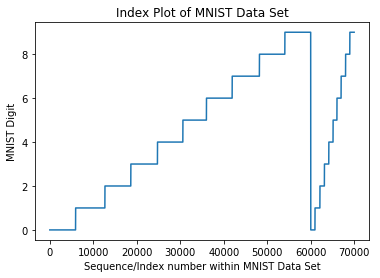

In [8]:
fig, axis = plt.subplots()
axis.set_xlabel('Sequence/Index number within MNIST Data Set')
axis.set_ylabel('MNIST Digit')
plt.title('Index Plot of MNIST Data Set')
plt.plot(y[:,])

As we can see in the above graphic, the first 60 thousand observations which will be used as training data cover 0-9 ten digits. The observations are arranged in order, which means zeros come before ones, ones before twos, and so on. Some learning
algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen. (Géron, 2017). Therefore, we will shuffle the train set before applying any machine learning algorithms. 

Examine the frequency distributions for the digits using pandas DataFrame to see if the data set is imbalanced. Code adapted from Miller (2017) exploring-mnist-v001.py.

In [9]:
mnist_df = pd.DataFrame({'label': y}) 
print('\nFrequency distribution for observations')
print(mnist_df['label'].value_counts(ascending = True)) 


Frequency distribution for observations
5.0    6313
4.0    6824
8.0    6825
6.0    6876
0.0    6903
9.0    6958
2.0    6990
3.0    7141
7.0    7293
1.0    7877
Name: label, dtype: int64


Split the data set to train and holdout test

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle train set. Code adapted from Géron (2017) Python notebook Chapter 3.

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
print('\n Structure of explanatory variable array of train set after shuffling:', 
      X_train.shape)
print('\n Structure of response array of train set after shuffling:', y_train.shape)


 Structure of explanatory variable array of train set after shuffling: (60000, 784)

 Structure of response array of train set after shuffling: (60000,)


# Multiclass Classification

Setup to record the time it takes to fit and evaluate Model 1 (without PCA transformation). It is sufficient to run a single time-elapsed test (replications = 1) for this assignment. Code adapted from run_python_runif_jump_start.py.

In [13]:
import time
test_time = [] 
f1 = []

Fitting a random forest classifier using the full set of 784 explanatory variables and the model training set. Record the time it takes to fit the model and evaluate the model on the holdout data. 

In [14]:
start_time = time.clock()
rnd_clf = RandomForestClassifier(n_estimators=10, max_features='sqrt', 
                                 n_jobs=-1, bootstrap = True, 
                                 random_state=RANDOM_SEED)
rnd_clf.fit(X_train, y_train)
y_test_predict = rnd_clf.predict(X_test)
f1_rnd = f1_score(y_test, y_test_predict,average='micro')
end_time = time.clock()

runtime = end_time - start_time 
test_time.append(runtime*1000)  # report in milliseconds
f1.append(f1_rnd)

For measuring the generalization error and prevent data leakage, we will do the PCA transformation on the train set and use the eigenvectors to transform the holdout test set into the same principal component space. To achieve this goal, we can create a Pipeline containing a PCA transformer, followed by a RandomForestClassifier. 

In [15]:
start_time = time.clock()
pca_clf = Pipeline([
    ("pca", PCA(n_components=0.95)),
    ("randomforest", RandomForestClassifier(n_estimators=10, max_features='sqrt', 
                                            n_jobs=-1,bootstrap = True, 
                                            random_state=RANDOM_SEED))])
pca_clf.fit(X_train, y_train)
y_test_pca_predict = pca_clf.predict(X_test)
f1_pca = f1_score(y_test, y_test_pca_predict, average = 'micro')
end_time = time.clock()

runtime = end_time - start_time 
test_time.append(runtime * 1000)  # report in milliseconds
f1.append(f1_pca)

In [16]:
test_time_df = pd.DataFrame(test_time).T
test_time_df.columns = ('RandomForest', 'RandomForest with PCA')
print('Time Spent to Conduct Analysis:\n')
print(test_time_df)

Time Spent to Conduct Analysis:

   RandomForest  RandomForest with PCA
0   2027.237776            9195.751532


In [17]:
f1_df = pd.DataFrame(f1).T
f1_df.columns = ('RandomForest', 'RandomForest with PCA')
print('Performance Comparison with F1 score:\n')
print(f1_df)

Performance Comparison with F1 score:

   RandomForest  RandomForest with PCA
0        0.9458                 0.8925


In [22]:
time_increase = (test_time_df.iloc[0,1] - 
                 test_time_df.iloc[0,0])/test_time_df.iloc[0,0]
print('Time increased by using PCA as preliminary process: {:.1%}'
      .format(time_increase))

Time increased by using PCA as preliminary process: 353.6%


In [20]:
accuracy_decrease = (f1_df.iloc[0,0] - f1_df.iloc[0,1])/f1_df.iloc[0,0]
print('Predictive accuracy decreased by useing PCA as preliminary process: {:.1%}'
      .format(accuracy_decrease))

Predictive accuracy decreased by useing PCA as preliminary process: 5.6%


As we can see, using PCA as preliminary to random forest classification decreases the model's predictive accuracy while significantly increases the time spent on model development and implementation. While the 5.6% decrease in predictive accuracy may not be a big concern, depending on the specific application of the model, the drastically increased time on building and implementing the model will lead to higher cost for companies. Therefore, it is not recommended to use PCA as preliminary to random forest classifier.

Random forest classifier is transformation invariant. This means that transforming or regularizing data, such as the PCA transformation tested in this study, will not lead to a better performance of random forest classifier. On the other side, random forest classifier works by looking at possible splits and picking the ones optimize a certain criteria. By reducing the number of features, we might have made it more difficult to find the split, leading the algorithm to perform more iterations in order to find a good split.